# Tests for Build_OBM
This file is meant to test out individual code before scripting in the main repo. Do not use for running the occupant behavior model.

## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Read a DyD file
df = pd.read_csv("C:/devel/Build_OBM/data/home_1.csv")
df.head(3)

,Unnamed: 0,Schedule,Event,T_ctrl [oF],T_stp_cool [oF],T_stp_heat [oF],Humidity,HumidityExpectedLow,HumidityExpectedHigh,Thermostat_Temperature [oF],...,Remote_Sensor_9_Temperature [oF],Remote_Sensor_9_Motion,Remote_Sensor_10_Temperature [oF],Remote_Sensor_10_Motion,Remote_Sensor_11_Temperature [oF],Remote_Sensor_11_Motion,Remote_Sensor_12_Temperature [oF],Remote_Sensor_12_Motion,Remote_Sensor_13_Temperature [oF],Remote_Sensor_13_Motion
0,2017-09-01 00:00:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.2,...,74.5,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0
1,2017-09-01 00:05:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,74.5,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0
2,2017-09-01 00:10:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,74.4,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0


## Preprocessing data

In [3]:
# varInfo_1 = {'Unnamed: 0': 'DateTime' ,'Event': 'event' ,'Humidity': 'hum' ,'HumidityExpectedHigh': 'humExpHi' ,'HumidityExpectedLow': 'humExpLo' ,'RH_out': 'RH_out' ,'Remote_Sensor_1_Motion': 'RS1Mo' ,'Remote_Sensor_1_Temperature [oF]': 'RS1T' ,'Remote_Sensor_2_Motion': 'RS2Mo' ,'Remote_Sensor_2_Temperature [oF]': 'RS2T','Remote_Sensor_3_Motion': 'RS3Mo' ,'Remote_Sensor_3_Temperature [oF]': 'RS3T' ,'Remote_Sensor_4_Motion': 'RS4Mo' ,'Remote_Sensor_4_Temperature [oF]': 'RS4T' ,'Remote_Sensor_5_Motion': 'RS5Mo' ,'Remote_Sensor_5_Temperature [oF]': 'RS5T' ,'Remote_Sensor_6_Motion': 'RS6Mo' ,'Remote_Sensor_6_Temperature [oF]': 'RS6T' ,'Remote_Sensor_7_Motion': 'RS7Mo' ,'Remote_Sensor_7_Temperature [oF]': 'RS7T' ,'Remote_Sensor_8_Motion': 'RS8Mo' ,'Remote_Sensor_8_Temperature [oF]': 'RS8T','Remote_Sensor_9_Motion': 'RS9T' ,'Remote_Sensor_9_Temperature [oF]': 'RS9Mo' ,'Remote_Sensor_10_Motion': 'RS10T' ,'Remote_Sensor_10_Temperature [oF]': 'RS10Mo' ,'Remote_Sensor_11_Motion': 'RS11T' ,'Remote_Sensor_11_Temperature [oF]': 'RS11Mo' ,'Remote_Sensor_12_Motion': 'RS12T' ,'Remote_Sensor_12_Temperature [oF]': 'RS12Mo' ,'Remote_Sensor_13_Motion': 'RS13T' ,'Remote_Sensor_13_Temperature [oF]': 'RS13Mo' ,'Schedule': 'schedule' ,'T_ctrl [oF]': 'T_ctrl' ,'T_out [oF]': 'T_out' ,'T_stp_cool [oF]': 'T_stp_cool' ,'T_stp_heat [oF]': 'T_stp_heat' ,'Thermostat_Motion': 'TSMo' ,'Thermostat_Temperature [oF]': 'TST' ,'auxHeat1 [sec]': 'auxHeat1' ,'auxHeat2 [sec]': 'auxHeat2' ,'auxHeat3 [sec]': 'auxHeat3' ,'compCool1 [sec]': 'cmpCool1' ,'compCool2 [sec]': 'cmpCool2' ,'compCool3 [sec]': 'cmpCool3' ,'compHeat1 [sec]': 'cmpHeat1' ,'compHeat2 [sec]': 'cmpHeat2' ,'compHeat3 [sec]': 'cmpHeat3' ,'dehumidifier': 'dehumidifier','fan [sec]': 'fan' ,'humidifier': 'humidifier' ,'ventilator': 'ventilator'}
varInfo = { 'Header in CSV':['Unnamed: 0', 'Event','Humidity', 'HumidityExpectedHigh', 'HumidityExpectedLow','RH_out','Remote_Sensor_1_Motion','Remote_Sensor_1_Temperature [oF]','Remote_Sensor_2_Motion','Remote_Sensor_2_Temperature [oF]','Remote_Sensor_3_Motion','Remote_Sensor_3_Temperature [oF]',
'Remote_Sensor_4_Motion', 'Remote_Sensor_4_Temperature [oF]', 'Remote_Sensor_5_Motion', 'Remote_Sensor_5_Temperature [oF]', 'Remote_Sensor_6_Motion', 'Remote_Sensor_6_Temperature [oF]', 'Remote_Sensor_7_Motion', 'Remote_Sensor_7_Temperature [oF]', 'Remote_Sensor_8_Motion', 'Remote_Sensor_8_Temperature [oF]',
'Remote_Sensor_9_Motion', 'Remote_Sensor_9_Temperature [oF]', 'Remote_Sensor_10_Motion', 'Remote_Sensor_10_Temperature [oF]', 'Remote_Sensor_11_Motion', 'Remote_Sensor_11_Temperature [oF]', 'Remote_Sensor_12_Motion', 'Remote_Sensor_12_Temperature [oF]', 'Remote_Sensor_13_Motion', 'Remote_Sensor_13_Temperature [oF]',
'Schedule', 'T_ctrl [oF]', 'T_out [oF]', 'T_stp_cool [oF]', 'T_stp_heat [oF]', 'Thermostat_Motion', 'Thermostat_Temperature [oF]', 'auxHeat1 [sec]', 'auxHeat2 [sec]', 'auxHeat3 [sec]', 'compCool1 [sec]', 'compCool2 [sec]', 'compCool3 [sec]', 'compHeat1 [sec]', 'compHeat2 [sec]', 'compHeat3 [sec]', 'dehumidifier', 'fan [sec]',
'humidifier', 'ventilator'],
 'VariableName':['DateTime', 'event', 'hum', 'humExpHi','humExpLo' ,'RH_out' ,'RS1Mo' ,'RS1T' ,'RS2Mo' ,'RS2T' ,'RS3Mo' ,'RS3T' ,'RS4Mo' ,'RS4T' ,'RS5Mo' ,'RS5T' ,'RS6Mo' ,'RS6T' ,'RS7Mo' ,'RS7T' ,'RS8Mo' ,'RS8T',
 'RS9Mo', 'RS9T' ,'RS10Mo' ,'RS10T' ,'RS11Mo' ,'RS11T' ,'RS12Mo' ,'RS12T' ,'RS13Mo' ,'RS13T' ,'schedule' ,'T_ctrl' ,'T_out' ,'T_stp_cool' ,'T_stp_heat' ,'TSMo' ,'TST' ,'auxHeat1' ,'auxHeat2' ,'auxHeat3' ,'cmpCool1' ,'cmpCool2' ,'cmpCool3' ,'cmpHeat1' ,'cmpHeat2' ,'cmpHeat3' ,'dehumidifier' ,'fan' ,'humidifier' ,'ventilator'],
 'Type':['datetime', 'categorical', 'double', 'double','float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'categorical' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float'],
 'Unit':['', '', '%', '%','%' ,'%' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'oF' ,'oF' ,'oF' ,'' ,'F' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'' ,'s' ,'' ,''],
 'Description':['Date and time that the reading was taken', 'Anything that modifies the schedule (e.g. A temperature hold, demand response event, Vacation, SmartRecovery feature)',
                'Indoor humidity (in RH%)', 'Setpoint (for users who have a Humidifier) (in RH%)','Setpoint (for users who have a Humidifier) (in RH%)' ,'' ,'Detects motion (binary) at that date/time at the remote sensor 1' ,'Indoor temperature measurement at the remote sensor 1' ,'Detects motion (binary) at that date/time at the remote sensor 2' ,'Indoor temperature measurement at the remote sensor 2' ,'Detects motion (binary) at that date/time at the remote sensor 3' ,'Indoor temperature measurement at the remote sensor 3' ,'Detects motion (binary) at that date/time at the remote sensor 4' ,'Indoor temperature measurement at the remote sensor 4' ,'Detects motion (binary) at that date/time at the remote sensor 5' ,'Indoor temperature measurement at the remote sensor 5' ,'Detects motion (binary) at that date/time at the remote sensor 6' ,'Indoor temperature measurement at the remote sensor 6' ,'Detects motion (binary) at that date/time at the remote sensor 7' ,'Indoor temperature measurement at the remote sensor 7' ,'Detects motion (binary) at that date/time at the remote sensor 8' ,'Indoor temperature measurement at the remote sensor 8' ,'Detects motion (binary) at that date/time at the remote sensor 9' ,'Indoor temperature measurement at the remote sensor 9' ,'Detects motion (binary) at that date/time at the remote sensor 10' ,'Indoor temperature measurement at the remote sensor 10' ,'Detects motion (binary) at that date/time at the remote sensor 11' ,'Indoor temperature measurement at the remote sensor 11' ,'Detects motion (binary) at that date/time at the remote sensor 12' ,'Indoor temperature measurement at the remote sensor 12' ,'Detects motion (binary) at that date/time at the remote sensor 13' ,'Indoor temperature measurement at the remote sensor 13' ,'Fields include things like Vacation, Sleep, Away, Nap, etc. which are user-defined descriptors for desired set points against activity/behaviour' ,'Average indoor temperature based on relevant sensors as defined by the schedule or mode the user is in' ,'Outdoor temperate for nearest weather station' ,'Indoor cool setpoint' ,'Indoor heat setpoint' ,'Detects motion (binary) at that date/time' ,'Indoor measurement at the thermostat (I.e. Not remote sensor)' ,'Runtime (seconds) of stage 1 of any heat source other than a heat pump' ,'Runtime (seconds) of stage 2 of any heat source other than a heat pump' ,'Runtime (seconds) of stage 3 of any heat source other than a heat pump' ,'Runtime (seconds) for any cooling stage 1' ,'Runtime (seconds) for any cooling stage 2' ,'Runtime (seconds) for any cooling stage 3' ,'Runtime (seconds) for stage 1 of heat-pumps used in heating' ,'Runtime (seconds) for stage 2 of heat-pumps used in heating' ,'Runtime (seconds) for stage 3 of heat-pumps used in heating' ,'' ,'Runtime (seconds) for fan' ,'' ,'']}
df_var = pd.DataFrame.from_dict(varInfo)
df_var.set_index('Header in CSV',inplace=True)
columns2replace = df_var['VariableName'].to_dict()
df = df.rename(columns=columns2replace)

# Add motion column that aggregates all motion data into a boolean value
def agg_motion(columns,row):
    return row[columns].any()

motion_colmns =[x for x in df.columns if 'Mo' in x]
df['mo'] = df.apply(lambda row: agg_motion(motion_colmns,row), axis=1)
# Change string series to datetime series
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['schedule'] = df['schedule'].astype("category")
df['event'] = df['event'].astype("category")
df.head()


,DateTime,schedule,event,T_ctrl,T_stp_cool,T_stp_heat,hum,humExpLo,humExpHi,TST,...,RS9Mo,RS10T,RS10Mo,RS11T,RS11Mo,RS12T,RS12Mo,RS13T,RS13Mo,mo
0,2017-09-01 00:00:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.2,...,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False
1,2017-09-01 00:05:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False
2,2017-09-01 00:10:00,custom_3,Hold,73.3,73.0,63.0,51.0,0.0,0.0,73.3,...,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False
3,2017-09-01 00:15:00,custom_3,Hold,73.2,73.0,63.0,52.0,0.0,0.0,73.3,...,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False
4,2017-09-01 00:20:00,custom_3,Hold,73.2,73.0,63.0,52.0,0.0,0.0,73.2,...,0.0,73.4,0.0,72.0,0.0,72.1,0.0,74.1,0.0,False


<AxesSubplot:ylabel='T_ctrl'>

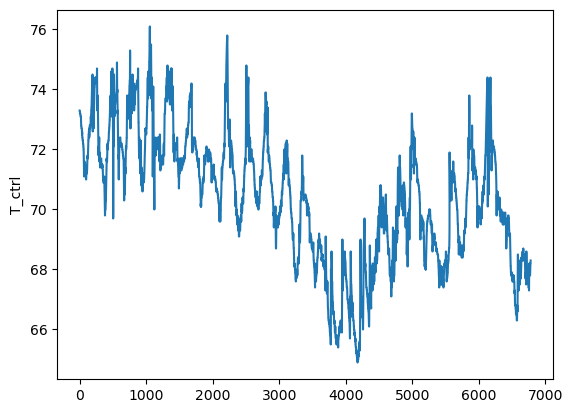

In [4]:
sns.lineplot(x=range(0,len(df['T_ctrl'])),y=df['T_ctrl'])

In [5]:
df_new = df.copy()
cols_2_keep = ['DateTime', 'schedule', 'event', 'T_ctrl', 'T_stp_cool', 'T_stp_heat',
       'hum', 'T_out', 'cmpCool1', 'cmpHeat1', 'fan','mo']
# df_new.drop(df_new.columns.difference(cols_2_keep).values)
df_new.drop(df_new.columns.difference(cols_2_keep), 1, inplace=True)

c:\tools\Anaconda3\envs\build_obm\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


### Save/read to/from hdf5 format

In [6]:
df_new.to_hdf('sample_data1.h5', key='df_new', mode='w',format="table")
df_read = pd.read_hdf('sample_data1.h5')
df_read.head()

,DateTime,schedule,event,T_ctrl,T_stp_cool,T_stp_heat,hum,T_out,cmpCool1,cmpHeat1,fan,mo
0,2017-09-01 00:00:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,0.0,0.0,False
1,2017-09-01 00:05:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,0.0,0.0,False
2,2017-09-01 00:10:00,custom_3,Hold,73.3,73.0,63.0,51.0,60.3,0.0,0.0,0.0,False
3,2017-09-01 00:15:00,custom_3,Hold,73.2,73.0,63.0,52.0,60.3,0.0,0.0,0.0,False
4,2017-09-01 00:20:00,custom_3,Hold,73.2,73.0,63.0,52.0,60.3,0.0,0.0,0.0,False


In [25]:
np.median(np.diff(df_read.DateTime.values))

numpy.timedelta64(300000000000,'ns')

In [42]:
df_read.DateTime.dt.minute


0        0
1        5
2       10
3       15
4       20
        ..
6773    35
6774    40
6775    45
6776    50
6777    55
Name: DateTime, Length: 6778, dtype: int64